In [344]:
Tmax=15 #Temperatura exterior màxima
Tmin=5 #Temperatura exterior mínima
Tinic1=17 #el primer dia a les 6 del matí tenim una temperatura de 17 graus
tenc_mati=6 #temps en el qual encenem la calefacció pel matí
tenc_vesprada=16 #temps en el qual encenem la calefacció per la vesprada
k=0.1
w=2*pi/24 
Te(t)=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*t+pi) #suposem que la temperatura exterior varia sinusoidalment
#desfas de pi graus per a que a les 6 del matí hi hagi el mínim de temperatura
q(t)=1 #funció transitòria, la multiplicarem per uns coeficients per a veure quina es adecuada
Q22(t)=k*(22-Te(t)) #funció estacionària que mantén la temperatura a 22ºC
Q17(t)=k*(17-Te(t)) #funció estacionària que mantén la temperatura a 17ºC

In [345]:
T=function('T')(t)
eq=[]
for i in range(7,12):
    eq.append(diff(T(t),t)==q(t)*i-k*(T(t)-Te(t)))
plots=[]
for i in eq:
    plots.append(plot(desolve(i,[T(t),t],[tenc_mati,Tinic1]),[t,tenc_mati,7])) #engeguem la calefacció a les 6 del matí
#volem arribar a 22ºC a les 7 del matí
eq

[diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 8.00000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 9.00000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 10.0000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 11.0000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 12.0000000000000]

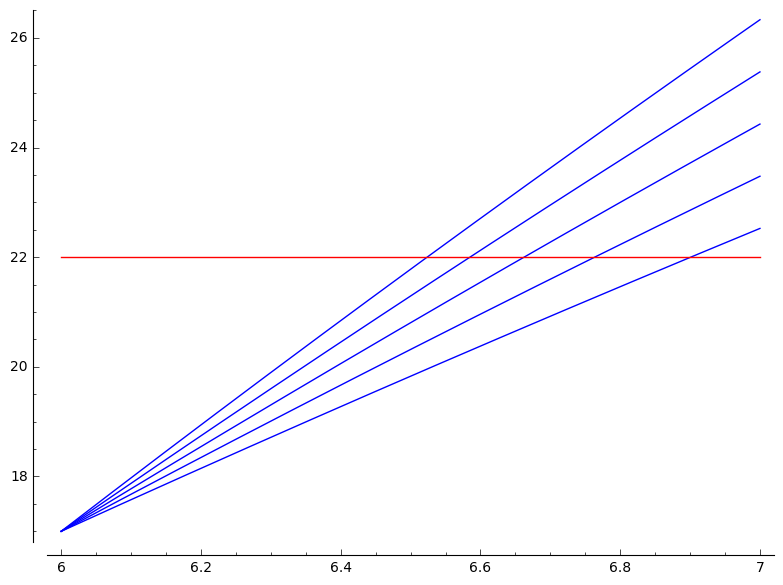

In [346]:
show(sum(plots)+plot(22,[t,tenc_mati,7],color='red'))

In [347]:
sols=[]
for i in eq:
    sols.append(desolve(i,[T(t),t],[tenc_mati,Tinic1]))
solsmati=sols[0]

In [348]:
temps=[] #trobem els temps en els quals s'arriba a la temperatura desitjada: 22ºC
for i in sols:
    temps.append(find_root(i-22,tenc_mati,7))
temps

[6.9007430152490725,
 6.763334931612151,
 6.662270640351427,
 6.5848265719529815,
 6.523592923088474]

In [349]:
#per a decidir quina és millor fem una estimació del gasto energètic de cada funció fins a les 9h 
#hora en la qual suposem començara a hi haver gent en l'habitació 
#integrem q*i entre 0 i t*, i Q(t) entre t* i les 9, per a estimar el gasto energètic durant la nit, ens quedarem amb 
#la funció que ens dóne menor gasto energètic

In [350]:
integral=[]
for i in range(0,5):
    integral.append((integrate(q(t)*(i+7),t,tenc_mati,temps[i])+integrate(Q22(t),t,temps[i],9)).n())
    #apaguem la calefacció a les 9
    print(integrate(Q22(t),t,temps[i],9))

-1.0*(-2.5191083817011135*pi + 6.0*cos(0.75*pi) - 6.0*cos(0.5750619179374227*pi))/pi
-1.0*(-2.683998082065419*pi + 6.0*cos(0.75*pi) - 6.0*cos(0.5636112443010126*pi))/pi
-1.0*(-2.8052752315782876*pi + 6.0*cos(0.75*pi) - 6.0*cos(0.5551892200292856*pi))/pi
-1.0*(-2.898208113656423*pi + 6.0*cos(0.75*pi) - 6.0*cos(0.5487355476627485*pi))/pi
-1.0*(-2.971688492293832*pi + 6.0*cos(0.75*pi) - 6.0*cos(0.5436327435907061*pi))/pi


In [351]:
#veiem que el millor es prendre q(t)=7 per tant Integral[0] representa el gasto energètic
#del nostre model des de les 6 fins a les 9
qmati(t)=7
integral

[9.72857492508370,
 9.76201987150311,
 9.78670671851660,
 9.80567613338837,
 9.82070774454599]

In [352]:
#ara a les 9 apaguem la calefacció, hem de veure quina temperatura hi ha a la casa a les 4 de la vesprada
#quan tornarem a encendre la calefacció
eqlliure=diff(T(t),t)==-k*(T(t)-Te(t))
soldia=desolve(eqlliure,[T(t),t],[9,22])
Tinic2=soldia(16)
Tinic2.n()

16.4857985417045

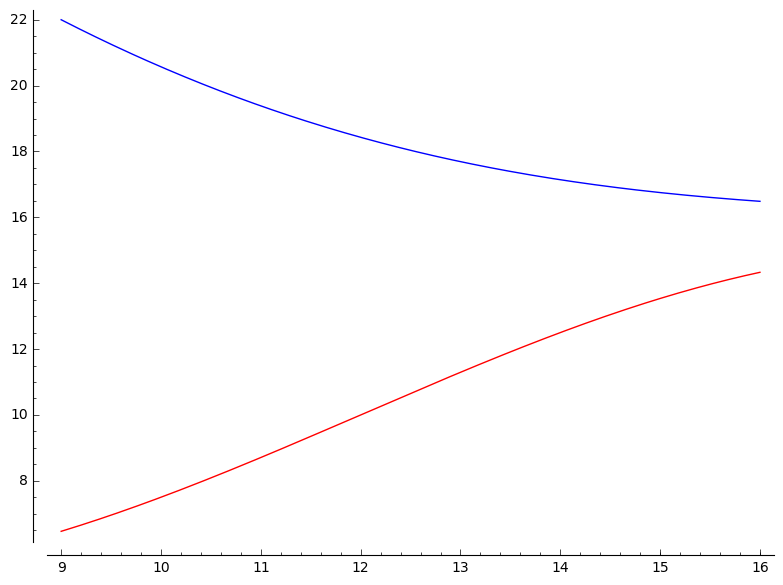

In [353]:
plot(soldia,[t,9,16])+plot(Te,[t,9,16],color='red')

In [354]:
eq2=[]
for i in range(6,11):
    eq2.append(diff(T(t),t)==q(t)*i-k*(T(t)-Te(t)))
plots=[]
for i in eq2:
    plots.append(plot(desolve(i,[T(t),t],[tenc_vesprada,Tinic2]),[t,tenc_vesprada,17])) #engeguem la calefacció a les 4 de la vesprada
#volem arribar a 22ºC a les 5 de la vesprada
eq2

[diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 7.00000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 8.00000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 9.00000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 10.0000000000000,
 diff(T(t), t) == -0.100000000000000*T(t) + 0.500000000000000*sin(pi + 1/12*pi*t) + 11.0000000000000]

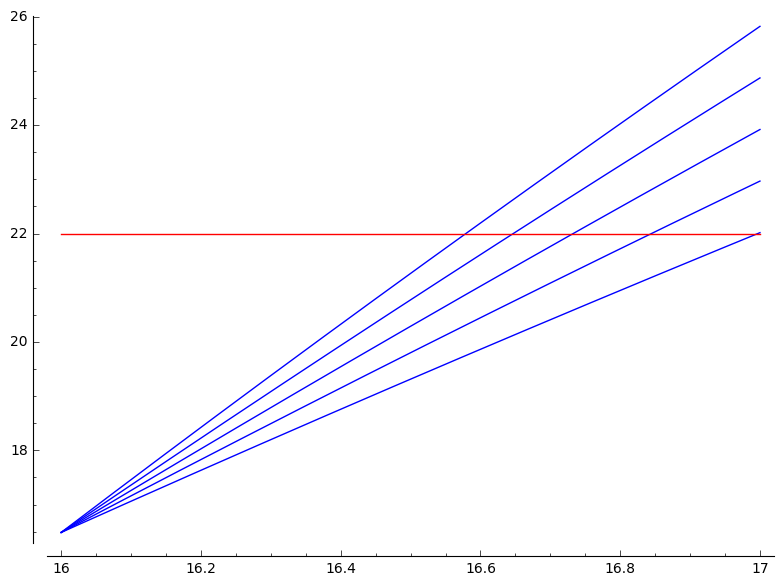

In [355]:
show(sum(plots)+plot(22,[t,tenc_vesprada,17],color='red'))

In [356]:
sols=[]
for i in eq2:
    sols.append(desolve(i,[T(t),t],[tenc_vesprada,Tinic2]))
solvesprada=sols[0]

In [357]:
temps=[] #trobem els temps en els quals s'arriba a la temperatura desitjada: 22ºC
for i in sols:
    temps.append(find_root(i-22,tenc_vesprada,17))
temps

[16.99676570764831,
 16.84454990207284,
 16.732604115593713,
 16.646827549176578,
 16.57901143435206]

In [358]:
integral2=[]
for i in range(0,5):
    integral2.append((integrate(q(t)*(i+6),t,tenc_vesprada,temps[i])+integrate(Q22(t),t,temps[i],23)).n())
    #apaguem la calefacció a les 11 de la nit

In [359]:
qvesprada(t)=6
integral2 #veiem que el millor és q(t)=6

[10.8438231271413,
 10.8846524044565,
 10.9147914408007,
 10.9379496035673,
 10.9562989406302]

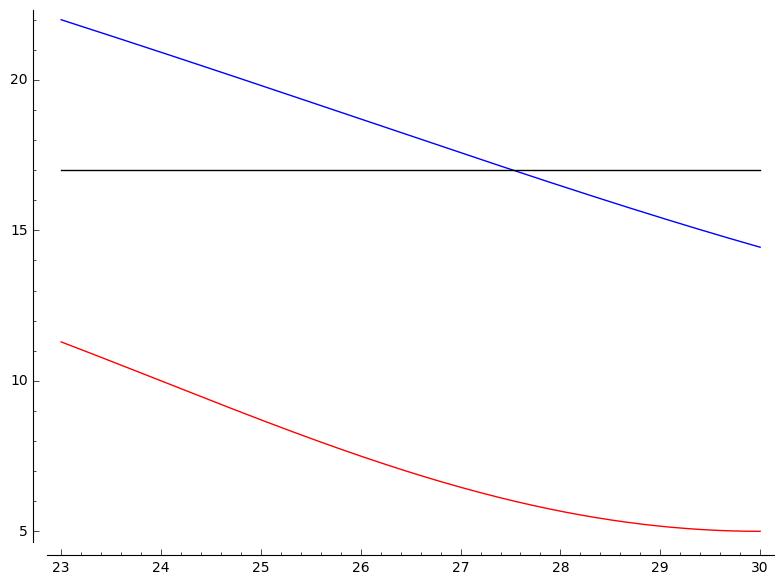

In [360]:
#calculem el temps en el qual s'arriba a 17ºC
solnit=desolve(eqlliure,[T(t),t],[23,22])
plot(solnit,[t,23,6+24])+plot(Te,[t,23,6+24],color='red')+plot(17,[t,23,6+24],color='black')

In [361]:
tempsnit=find_root(solnit-17,23,24+6)
tempsnit

27.52684146446119

In [362]:
gastonit=integrate(Q17(t),tempsnit,24+6).n()
gastonit

2.88318366126119

In [363]:
gastototal=integral[0]+integral2[0]+gastonit
gastototal

23.4555817134861

# Model 1.1 consistent en no apagar la calefacció durant la nit

### calculem ara el gasto energètic del model 1.1 desde les 6 del matí fins a les 9 del matí del dia següent.

In [364]:
gasto11=integrate(Q22,t,6,9)+integral2[0]+integrate(Q22,t,23,6+24)
gasto11.n()

26.0390800403453

In [365]:
from matplotlib import pyplot as plt

(15, 23)

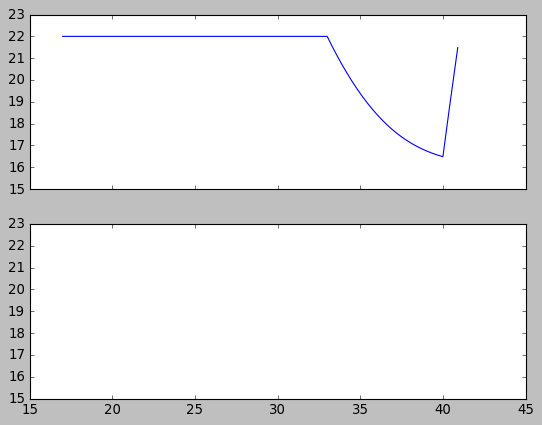

In [366]:
fig1, axs = plt.subplots(2, 1, sharex=True, sharey=True)
A=axs[0]
B=axs[1]
x=srange(17,24+17,step=0.1)
x1=srange(17,24+9,step=0.1)
y1=[]
for i in x1:
    y1.append(22)
x2=srange(9,16,step=0.1)
for i in x2:
    y1.append(soldia(i))
x3=srange(16,17,step=0.1)
for i in x3:
    y1.append(solvesprada(i))
A.plot(x,y1)
A.set_ylim(15,23)

(15, 23)

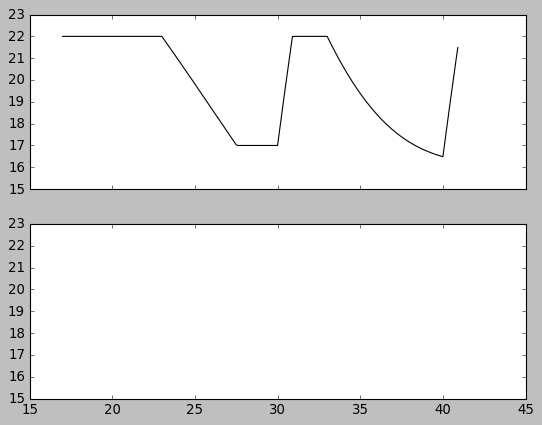

In [381]:
fig2, axs = plt.subplots(2, 1, sharex=True, sharey=True)
A=axs[0]
B=axs[1]
x=srange(17,24+17,step=0.1)
x1=srange(17,23,step=0.1)
y2=[]
for i in x1:
    y2.append(22)
x2=srange(23,tempsnit,step=0.1)
for i in x2:
    y2.append(solnit(i))
x3=srange(tempsnit+0.1,24+6,step=0.1)
for i in x3:
    y2.append(17)
x4=srange(6,6.9007430152490725,step=0.1)
for i in x4:
    y2.append(solsmati(i))
x5=srange(6.9007430152490725+0.1,9,step=0.1)
for i in x5:
    y2.append(22)
x6=srange(9,16,step=0.1)
for i in x6:
    y2.append(soldia(i))
x7=srange(16,17,step=0.1)
for i in x7:
    y2.append(solvesprada(i))
A.plot(x,y2,color='black')
A.set_ylim(15,23)